In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
sns.set_theme()
# sns.set(font_scale = 2)

In [42]:
results_df = pd.DataFrame(
    columns=["system_name", "run_id", "latency", "operation", "on_leader", "n_nodes", "n_clients", "order_on_write", "experiment"]
            )

# for f in glob.glob("results/experiment2_False_False_20211213211523*"):
#     df = pd.read_csv(f)
#     df["experiment"] = "read_heavy"
#     results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment2_False_False*"):
    df = pd.read_csv(f)
    df["experiment"] = "read_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment2_False_True*"):
    df = pd.read_csv(f)
    df["experiment"] = "write_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment2_True_False*"):
    df = pd.read_csv(f)
    df["experiment"] = "read_heavy"
    results_df = results_df.append(df, ignore_index=True)

for f in glob.glob("results/experiment2_True_True*"):
    df = pd.read_csv(f)
    df["experiment"] = "write_heavy"
    results_df = results_df.append(df, ignore_index=True)

# df = pd.read_csv('results/final/perf_exp_1.csv')
df = results_df
df.latency = df.latency * 1000


df = df.rename(columns={"n_nodes": "Nodes", "operation": "Operation", "experiment": "Experiment"})

df["Experiment"] = df["Experiment"].apply(lambda x: "Read Heavy" if x == "read_heavy" else "Write Heavy")


In [43]:
agg_df = df.groupby(['Experiment', 'Operation', 'run_id', 'Nodes', 'order_on_write']).latency.mean().reset_index()
agg_df["latency_factor"] = agg_df["latency"] / agg_df["Nodes"]

In [44]:
quantiles = np.linspace(0.8, 1, 512)

q_df = df.groupby(['Operation', 'Nodes', 'order_on_write', "Experiment"]).latency.quantile([.8, .9, .91, .92, .93, .94, .95, .98, .99, .999]).reset_index()


('write', True)
('write', True)


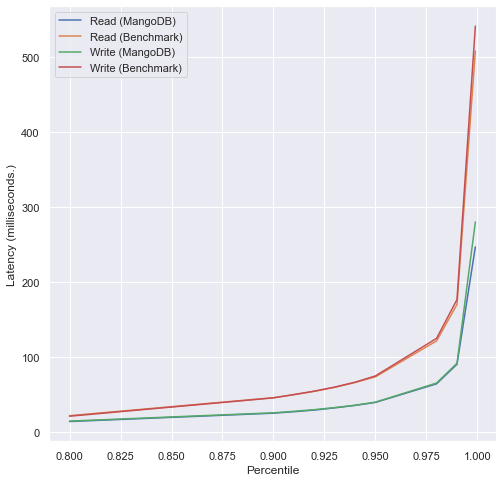

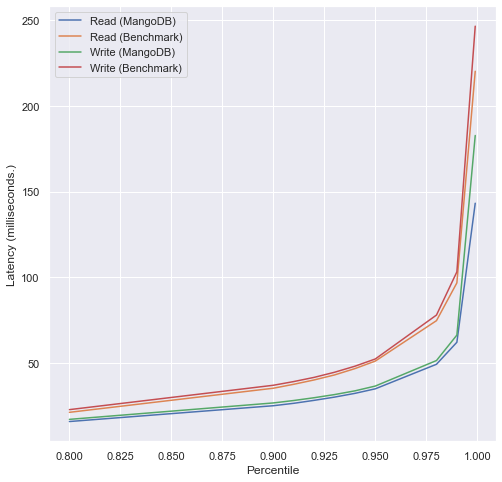

In [51]:
for group_name, group_df in q_df[q_df["Nodes"] == 4].groupby(["Experiment"]):
    print(group)
    ax = None
    for group, group_df2 in group_df.groupby(["Operation", "order_on_write"]):
        ax = group_df2.plot(x='level_4', y='latency', figsize=(8, 8), label=group, ax=ax)
    plt.legend(labels=["Read (MangoDB)","Read (Benchmark)", "Write (MangoDB)", "Write (Benchmark)"])
    plt.xlabel("Percentile")
    plt.ylabel("Latency (milliseconds.)")
    plt.savefig("results/exp_2_{}.png".format(group_name.lower().replace(" ", "_")), bbox_inches='tight')


# ax = None
# for group, group_df in q_df[q_df["n_nodes"] == 4].groupby(['operation', 'order_on_write']):
#     ax = group_df[group_df["level_5"] > .999].plot(x='level_5', y='latency', figsize=(12, 6), label=group, ax=ax)
#     sns.boxplot(x='n_nodes', y='latency', hue="order_on_write", data=group_df, showfliers=False)
#     plt.show()

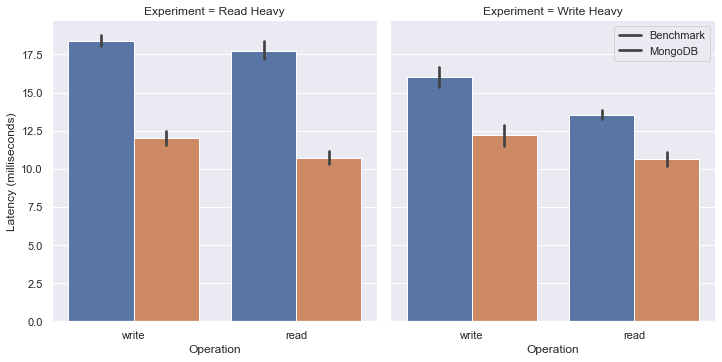

In [70]:
g = sns.catplot(kind="bar", x="Operation", y="latency", hue="order_on_write", hue_order=[True, False], col="Experiment", data=df[df["Nodes"] == 4], legend=False, legend_out=False)
g.set_ylabels("Latency (milliseconds)")
g.set_xlabels("Operation")
g.hand

hue_labels = ['Benchmark', 'MongoDB']
g.axes[0][1].legend({
    key: value for key, value in zip(hue_labels, g._legend_data.values())
}, loc="upper right")


# g.set( xlabel = "Operation", ylabel = "Latency (seconds)")
# g.set(ylim=(0, .2))
# for group, group_df in agg_df_leader.groupby(["experiment", 'operation']):
#     # display(group_df)
#     # axs[idx].set_title(group_df.iloc[0, 1])
#     # axs[idx].set_title(f"order_on_write={group[0]}, operation={group[1]}")
#     plt.title(str(group))
#     # plt.title(f"order_on_write={group[0]}, operation={group[1]}")
#     sns.barplot(x='experiment', y='latency', hue="on_leader", data=group_df)
#     # plt.show()
#     idx += 1

plt.savefig("results/exp_2_workload_barplot.png", bbox_inches='tight')